<a href="https://colab.research.google.com/github/Qaidsaher/MOVIE-RECOMMENDATION-SYSTEM-ML/blob/main/MOVIE_RECOMMENDATION_SYSTEM_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download MovieLens Data

In [1]:
!wget -nc https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip -o ml-latest-small.zip

--2025-01-23 23:12:21--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K   771KB/s    in 1.2s    

2025-01-23 23:12:24 (771 KB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Load Datasets

In [3]:
movies = pd.read_csv("ml-latest-small/movies.csv")
ratings = pd.read_csv("ml-latest-small/ratings.csv")
tags = pd.read_csv("ml-latest-small/tags.csv")

# Data Preprocessing

Data Information

In [4]:
print("Movies info:")
print(movies.info())
print("\nRatings info:")
print(ratings.info())
print("\nTags info:")
print(tags.info())

Movies info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Ratings info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Tags info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3

Check for missing values

In [5]:
print("\nMissing values in Movies dataset:")
print(movies.isnull().sum())
print("\nMissing values in Ratings dataset:")
print(ratings.isnull().sum())
print("\nMissing values in Tags dataset:")
print(tags.isnull().sum())



Missing values in Movies dataset:
movieId    0
title      0
genres     0
dtype: int64

Missing values in Ratings dataset:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in Tags dataset:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


Ensure data types are correct

In [6]:
movies['movieId'] = movies['movieId'].astype(int)
ratings['userId'] = ratings['userId'].astype(int)
ratings['movieId'] = ratings['movieId'].astype(int)
ratings['rating'] = ratings['rating'].astype(float)
tags['userId'] = tags['userId'].astype(int)
tags['movieId'] = tags['movieId'].astype(int)

 Merge ratings with movies on 'movieId'

In [7]:
ratings_movies = pd.merge(ratings, movies, on='movieId', how='left')

Merge with tags on both 'userId' and 'movieId' (left join to retain all ratings)

In [8]:
data = pd.merge(ratings_movies, tags, on=['userId', 'movieId'], how='left')

print("\nMerged Dataset Info:")
print(data.info())


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102677 entries, 0 to 102676
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       102677 non-null  int64  
 1   movieId      102677 non-null  int64  
 2   rating       102677 non-null  float64
 3   timestamp_x  102677 non-null  int64  
 4   title        102677 non-null  object 
 5   genres       102677 non-null  object 
 6   tag          3476 non-null    object 
 7   timestamp_y  3476 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.3+ MB
None


# Exploratory Data Analysis (EDA)

**Distribution of Movie Ratings**

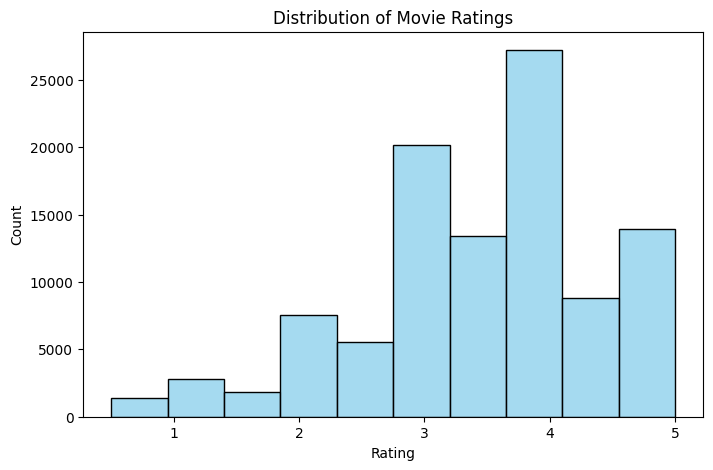

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(data['rating'], bins=10, kde=False, color='skyblue')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

**Top 10 Most-Rated Movies**


Top 10 Most-Rated Movies:
title
Pulp Fiction (1994)                          484
Forrest Gump (1994)                          335
Shawshank Redemption, The (1994)             319
Silence of the Lambs, The (1991)             283
Matrix, The (1999)                           280
Fight Club (1999)                            268
Star Wars: Episode IV - A New Hope (1977)    262
Braveheart (1995)                            245
Jurassic Park (1993)                         238
Terminator 2: Judgment Day (1991)            229
Name: count, dtype: int64


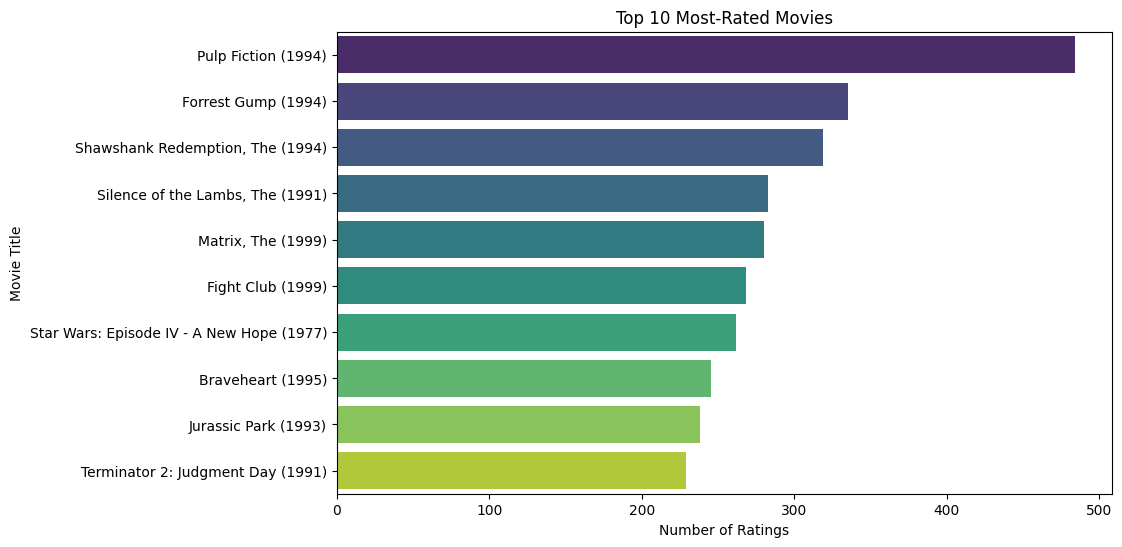

In [10]:
most_rated = data['title'].value_counts().head(10)
print("\nTop 10 Most-Rated Movies:")
print(most_rated)

plt.figure(figsize=(10,6))
sns.barplot(x=most_rated.values, y=most_rated.index, palette='viridis')
plt.title("Top 10 Most-Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show()

**Correlation Between User Ratings and Movie Genres**


Correlation of genres with rating:
Drama                 0.130071
Crime                 0.074573
War                   0.063663
Mystery               0.036980
Film-Noir             0.036156
Animation             0.033596
Documentary           0.031165
IMAX                  0.022639
Western               0.012187
Musical               0.010890
Thriller              0.002327
Adventure             0.000890
(no genres listed)    0.000331
Romance              -0.001203
Fantasy              -0.006181
Sci-Fi               -0.018890
Children             -0.029350
Action               -0.034342
Horror               -0.064368
Comedy               -0.087764
dtype: float64


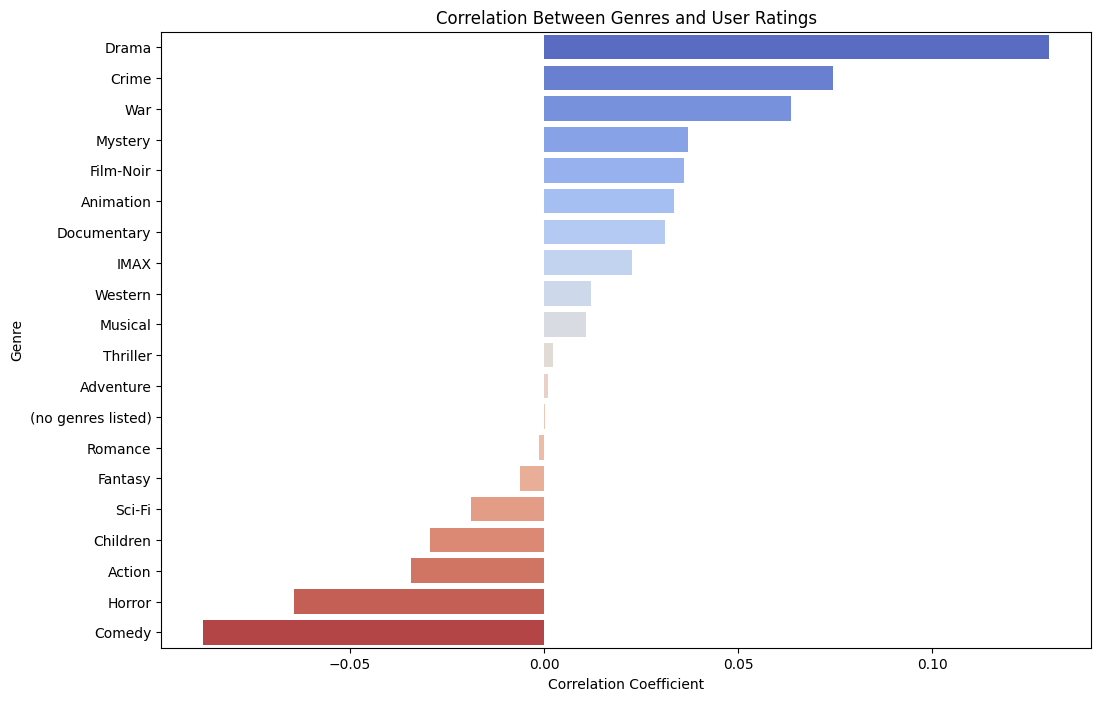

In [11]:
genres_expanded = data['genres'].str.get_dummies('|')
data_genres = pd.concat([data, genres_expanded], axis=1)

# Calculate correlation between genres and ratings
genre_corr = genres_expanded.corrwith(data['rating']).sort_values(ascending=False)
print("\nCorrelation of genres with rating:")
print(genre_corr)

# Plotting the correlation
plt.figure(figsize=(12,8))
sns.barplot(x=genre_corr.values, y=genre_corr.index, palette='coolwarm')
plt.title('Correlation Between Genres and User Ratings')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Genre')
plt.show()

# Feature Engineering

**Genre Matrix (One-Hot Encoding) for Each Movie**

In [12]:
unique_movies = movies.copy()
genre_matrix = unique_movies['genres'].str.get_dummies('|')
genre_matrix['movieId'] = unique_movies['movieId']

**Calculate Average Ratings for Each Movie**

In [13]:
average_ratings = data.groupby('movieId')['rating'].mean().reset_index()
average_ratings.rename(columns={'rating':'avg_rating'}, inplace=True)
unique_movies = pd.merge(unique_movies, average_ratings, on='movieId', how='left')

**Generate User-Movie Interaction Matrix (Optional for EDA)**

In [14]:
user_movie_matrix = data.pivot_table(index='userId', columns='movieId', values='rating')
print("\nUser-Movie Matrix Shape:", user_movie_matrix.shape)


User-Movie Matrix Shape: (610, 9724)


**Title Length**

In [15]:
unique_movies['title_length'] = unique_movies['title'].apply(lambda x: len(x.split()))
print("\nAdded 'title_length' feature to movies dataset.")
display(unique_movies[['title', 'title_length']].head())


Added 'title_length' feature to movies dataset.


,title,title_length
0,Toy Story (1995),3
1,Jumanji (1995),2
2,Grumpier Old Men (1995),4
3,Waiting to Exhale (1995),4
4,Father of the Bride Part II (1995),7


**Feature Consolidation** *italicized text*

In [16]:
features_full = pd.merge(data, genre_matrix, on='movieId', how='left')
features_full = pd.merge(features_full, average_ratings, on='movieId', how='left')
features_full = pd.merge(features_full, unique_movies[['movieId', 'title_length']], on='movieId', how='left')


**Create user-based features: mean rating & rating count**

In [17]:
user_stats = features_full.groupby('userId')['rating'].agg(['mean','count']).reset_index()
user_stats.rename(columns={'mean':'user_mean_rating','count':'user_rating_count'}, inplace=True)
features_full = pd.merge(features_full, user_stats, on='userId', how='left')
print("\nConsolidated Features DataFrame:")
display(features_full.head())


Consolidated Features DataFrame:


,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y,(no genres listed),Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rating,title_length,user_mean_rating,user_rating_count
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,0,0,...,0,0,0,0,0,0,3.920930,3,4.366379,232
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,0,0,...,0,1,0,0,0,0,3.245283,4,4.366379,232
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN,NaN,0,1,...,0,0,0,1,0,0,3.946078,2,4.366379,232
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaN,0,0,...,1,0,0,1,0,0,3.980392,4,4.366379,232
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaN,0,0,...,1,0,0,1,0,0,4.252404,4,4.366379,232


# Prepare Data for Machine Learning

Merge with Genre Matrix and Additional Features

In [18]:
df_features = features_full.copy()

In [19]:
drop_cols = ['userId','movieId','title','genres','timestamp','tag']
model_data = df_features.drop(columns=drop_cols, errors='ignore')

In [20]:
# Handle Missing Values After Merging (if any)
model_data = model_data.fillna(0)

Separate Features (X) and Target (y)

In [21]:

X = model_data.drop(columns=['rating'], errors='ignore')
y = model_data['rating']

print("\nFeatures included in X:")
print(X.columns)
print("X shape:", X.shape, "y shape:", y.shape)



Features included in X:
Index(['timestamp_x', 'timestamp_y', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'avg_rating',
       'title_length', 'user_mean_rating', 'user_rating_count'],
      dtype='object')
X shape: (102677, 26) y shape: (102677,)


# Train-Test Split

In [22]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (82141, 26)
Testing set size: (20536, 26)


# Machine Learning Models - Random Forest Regressor

In [23]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#  Evaluation Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("\nRandom Forest Regressor Results:")
print(f"  RMSE: {rmse_rf:.4f}")
print(f"  MAE : {mae_rf:.4f}")


Random Forest Regressor Results:
  RMSE: 0.7822
  MAE : 0.5783


# Machine Learning Models - Support Vector Machine Regressor

In [ ]:
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

#  Evaluation Metrics
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
mae_svm = mean_absolute_error(y_test, y_pred_svm)

print("\nSupport Vector Machine Regressor Results:")
print(f"  RMSE: {rmse_svm:.4f}")
print(f"  MAE : {mae_svm:.4f}")

# Evaluation and Visualization

In [ ]:
models = ['Random Forest', 'SVM']
rmse_scores = [rmse_rf, rmse_svm]
mae_scores = [mae_rf, mae_svm]

eval_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_scores,
    'MAE': mae_scores
})

print("\nComparison of Model Performance:")
display(eval_df)


 Visualization of RMSE and MAE

In [ ]:
plt.figure(figsize=(12,6))

# RMSE Comparison
plt.subplot(1,2,1)
sns.barplot(x='Model', y='RMSE', data=eval_df, palette='magma')
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.ylim(0, max(rmse_scores) + 0.5)

# MAE Comparison
plt.subplot(1,2,2)
sns.barplot(x='Model', y='MAE', data=eval_df, palette='magma')
plt.title("MAE Comparison")
plt.ylabel("MAE")
plt.ylim(0, max(mae_scores) + 0.5)

plt.tight_layout()
plt.show()

# Feature Importance for Random Forest






In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

print("\nTop 10 Feature Importances from Random Forest:")
print(top_features)

# Plotting Feature Importances
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='Blues_d')
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Feature Importance for SVM



In [ ]:
residuals_svm = y_test - y_pred_svm

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_svm, y=residuals_svm, alpha=0.5, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Ratings - SVM")
plt.xlabel("Predicted Ratings")
plt.ylabel("Residuals")
plt.show()